In [24]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

In [25]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [26]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [27]:
# Get only the cubes that have our line of interest in them
mol_tag = 42501
cubes, tbl = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=1>
   FREQ     ERR    LGINT    DR    ELO     GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l     name    Lab 
   MHz      MHz   MHz nm2        1 / cm          u                                                                                                      
 float64  float64 float64 int64 float64  int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64   str10    bool
--------- ------- ------- ----- -------- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ---------- ----
87086.582    0.03 -5.9024     3 163.2786   129    42   501   303    21     1    20    --    --    --    21     1    21    --    --    -- H2CCO, v=0 True, <Table length=1>
   FREQ      ERR    LGINT    DR    ELO     GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l     name     Lab 
   MHz       MHz   MHz nm2        1 / cm    

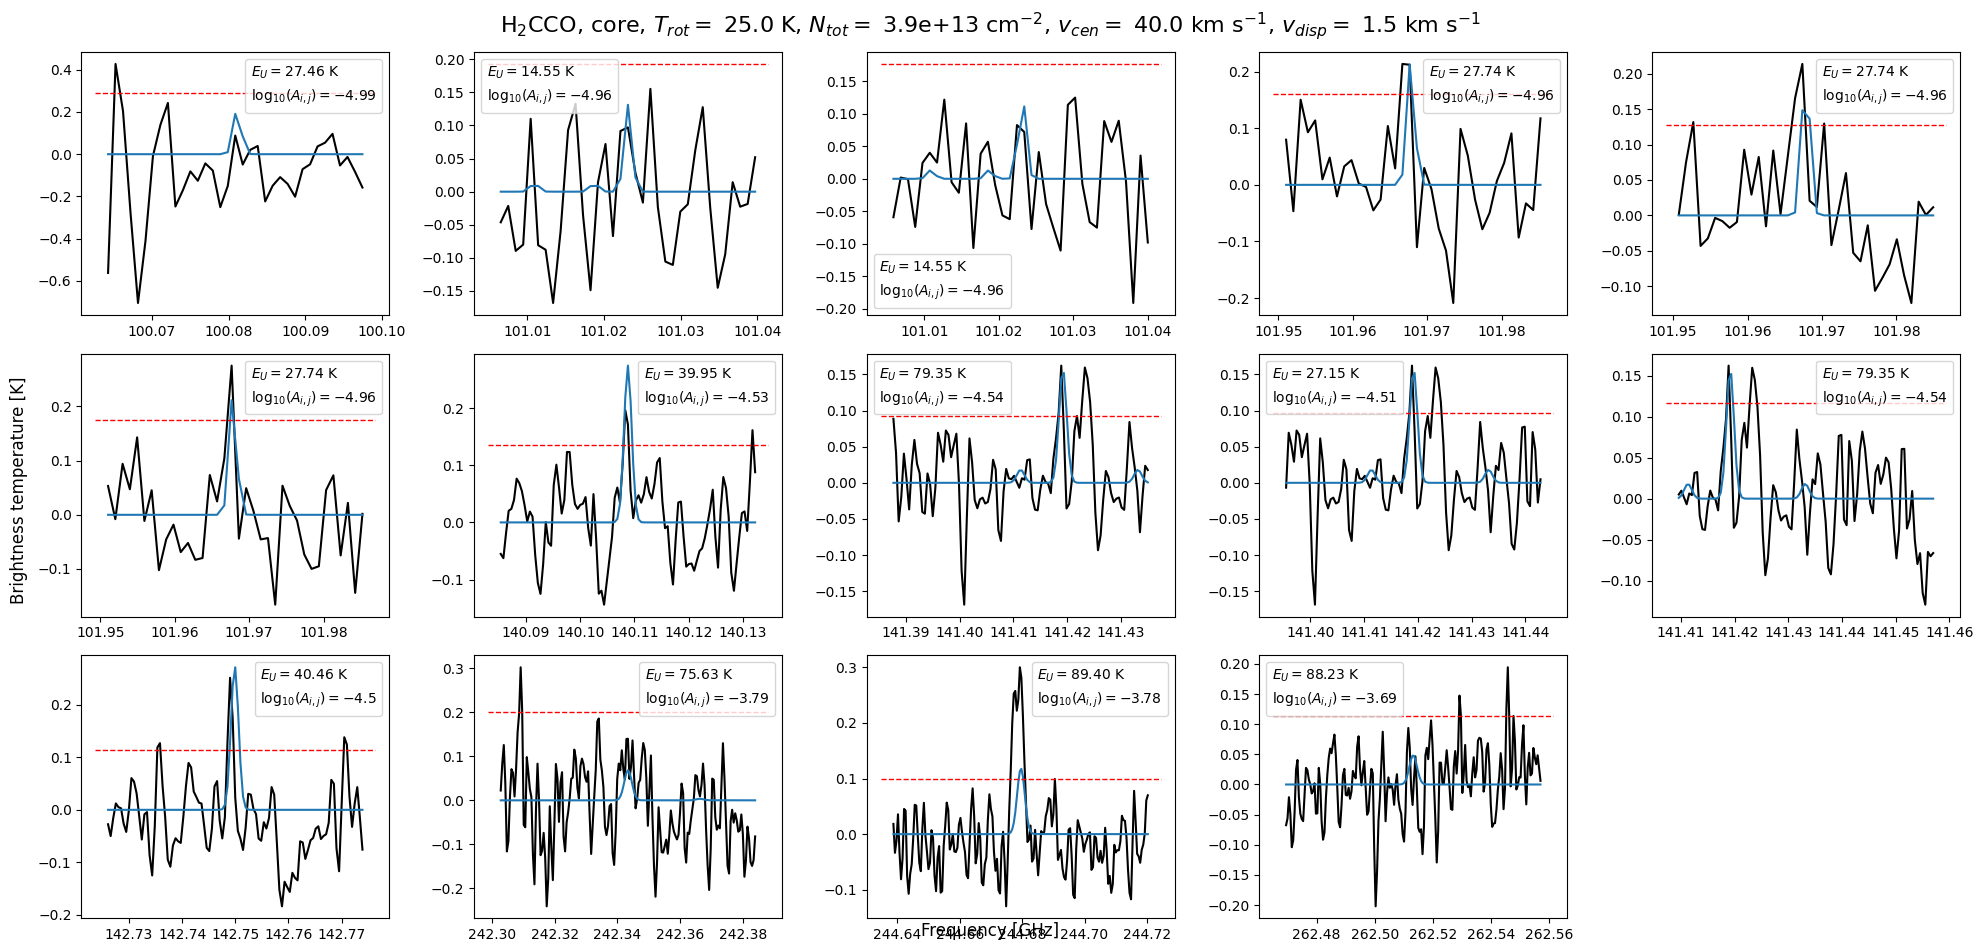

In [30]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 25., N_tot = 3.9e+13, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=10, 
               nrows=3, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=f'H$_2$CCO', extr_type="coord", 
               crd=crd, show_2_sigma=True)

In [13]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

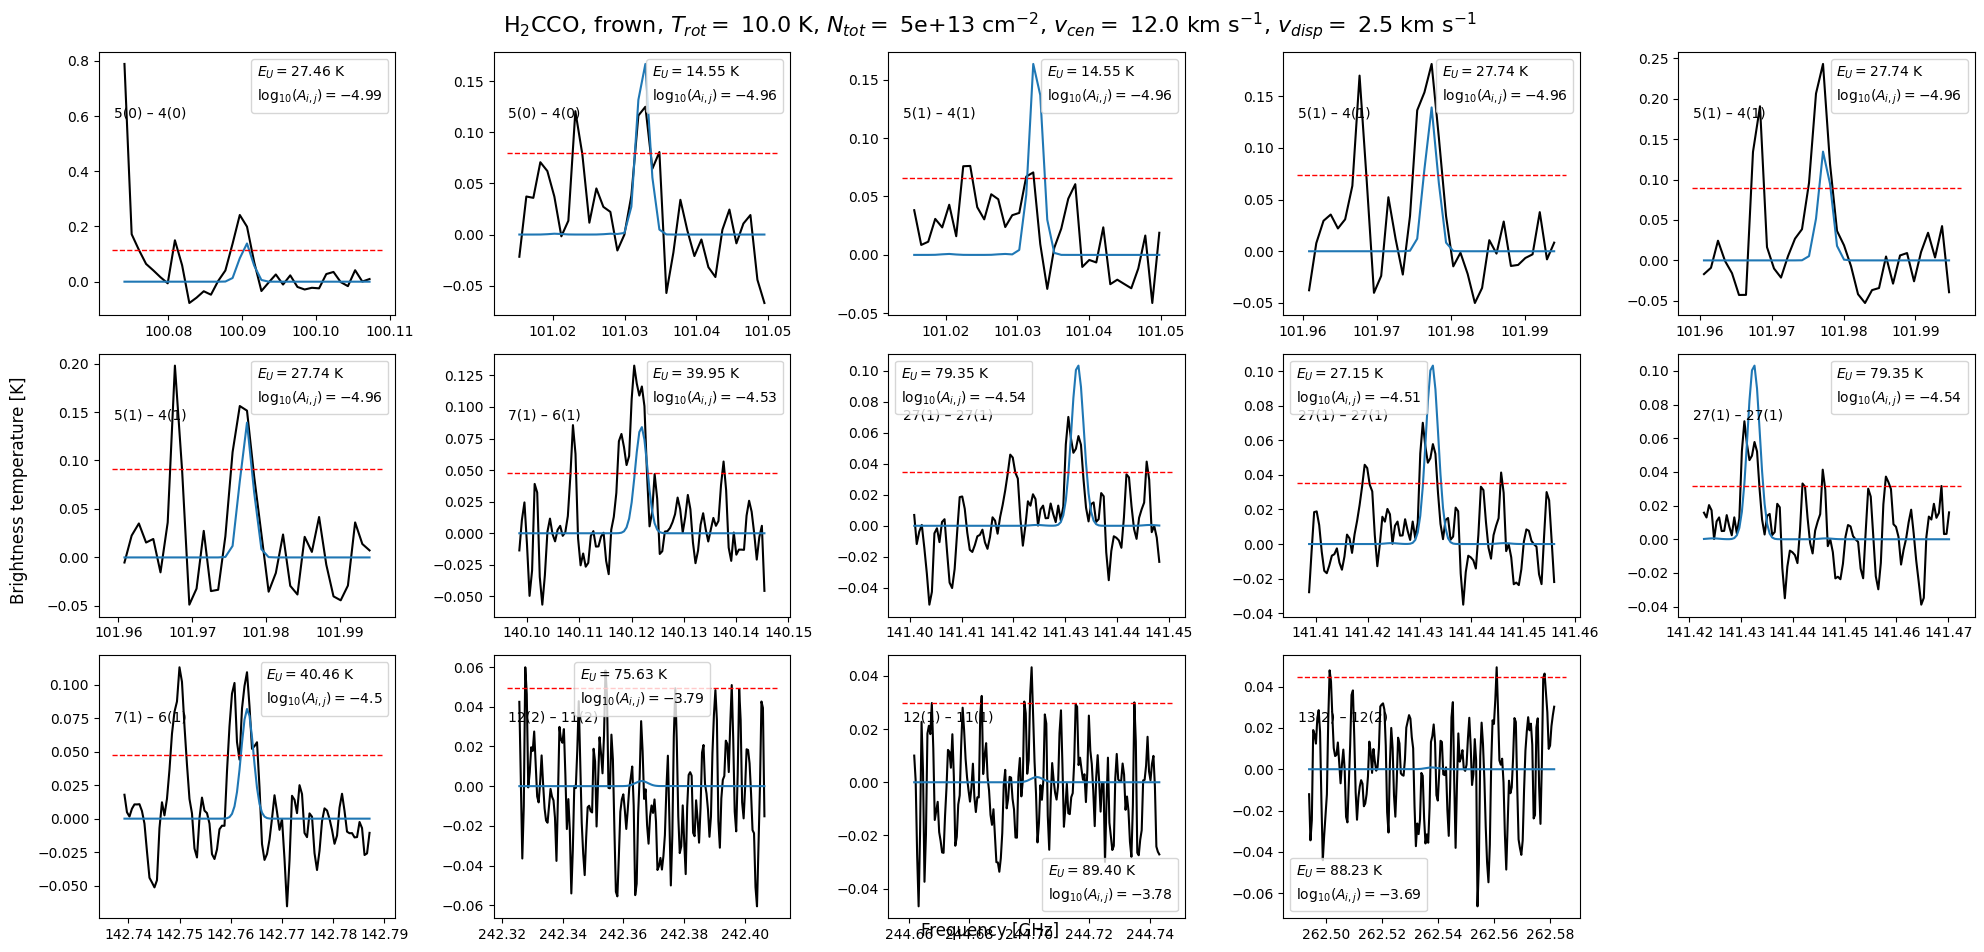

In [33]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 10., N_tot = 5.0e+13, v_cen = 12.*u.km/u.s, v_disp = 2.5*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=10, 
                       nrows=3, ncols=5, parse_loc=False, ret_tbl=True, line_by_line=True, name_for_plot=f'H$_2$CCO', 
                       extr_type="reg", just_data=False, show_2_sigma=True, return_freqs=True)

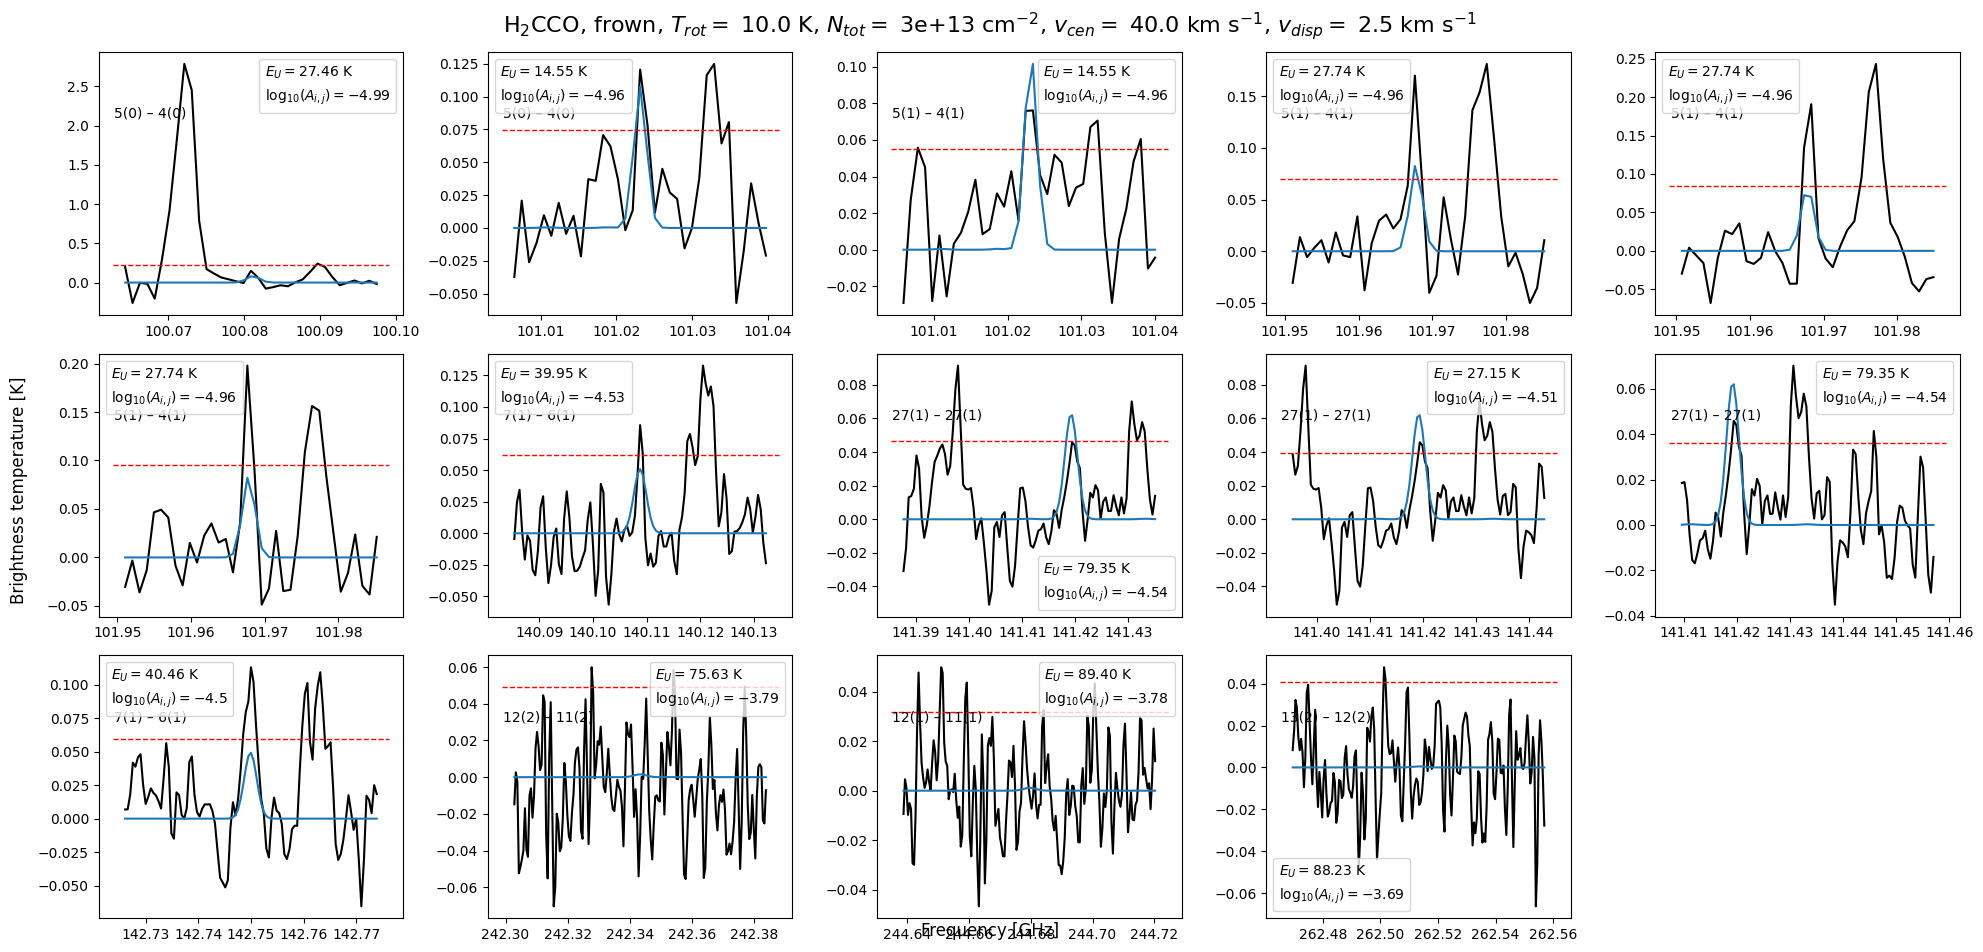

In [34]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 10., N_tot = 3.0e+13, v_cen = 40.*u.km/u.s, v_disp = 2.5*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=10, 
                       nrows=3, ncols=5, parse_loc=False, ret_tbl=True, line_by_line=True, name_for_plot=f'H$_2$CCO', 
                       extr_type="reg", just_data=False, show_2_sigma=True, return_freqs=True)

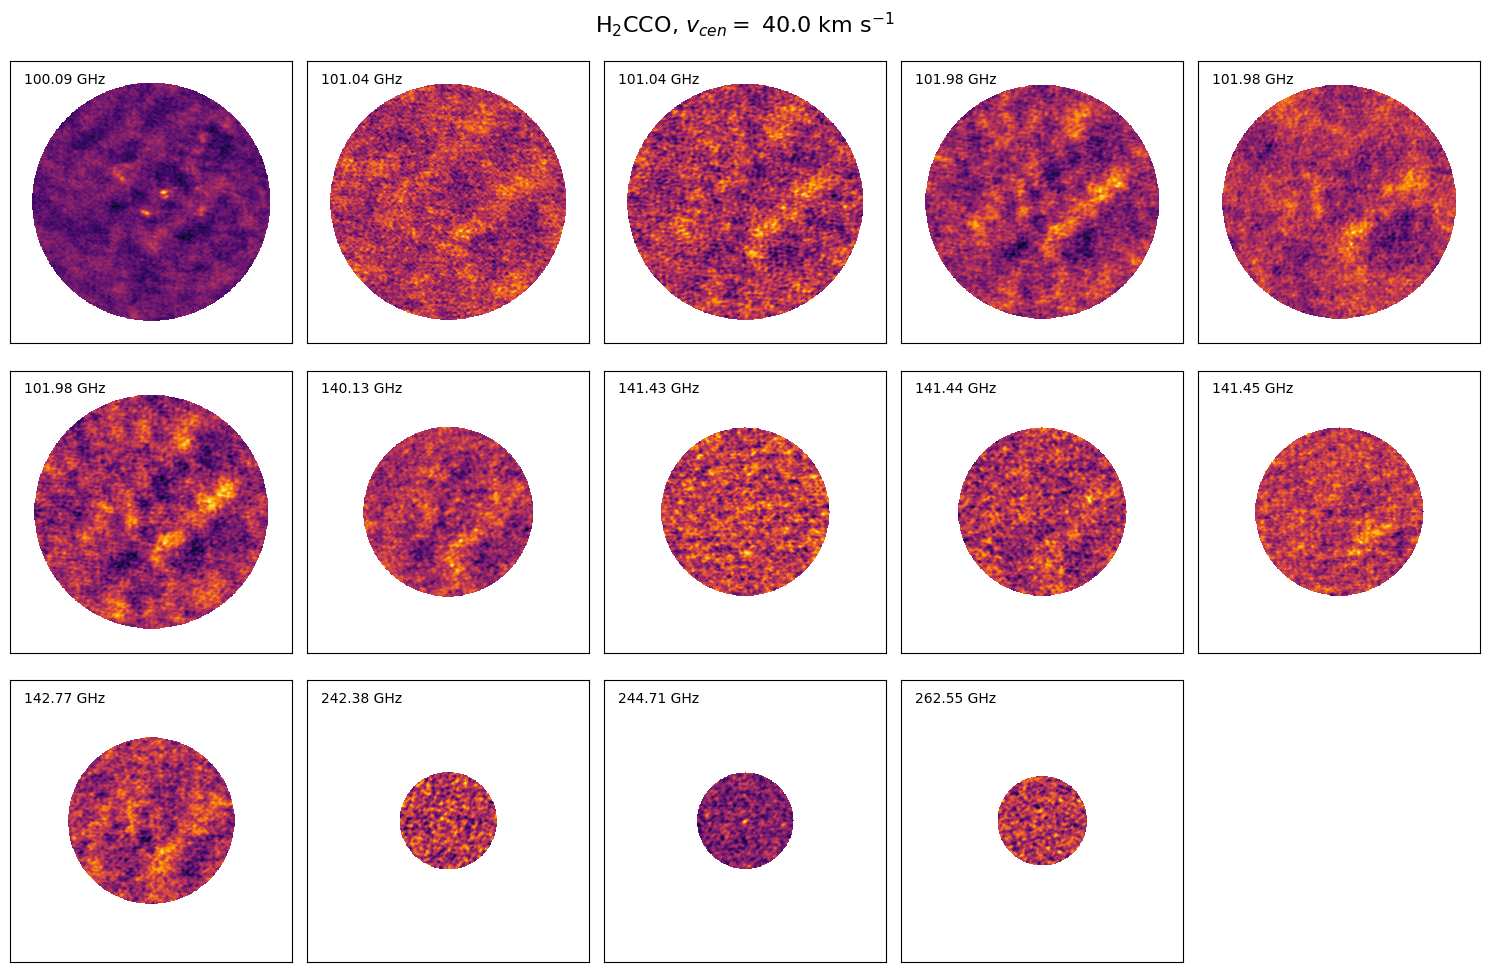

In [17]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40*u.km/u.s, fig_width=15, fig_height=10, nrows=3, ncols=5, name_for_plot=f'H$_2$CCO')

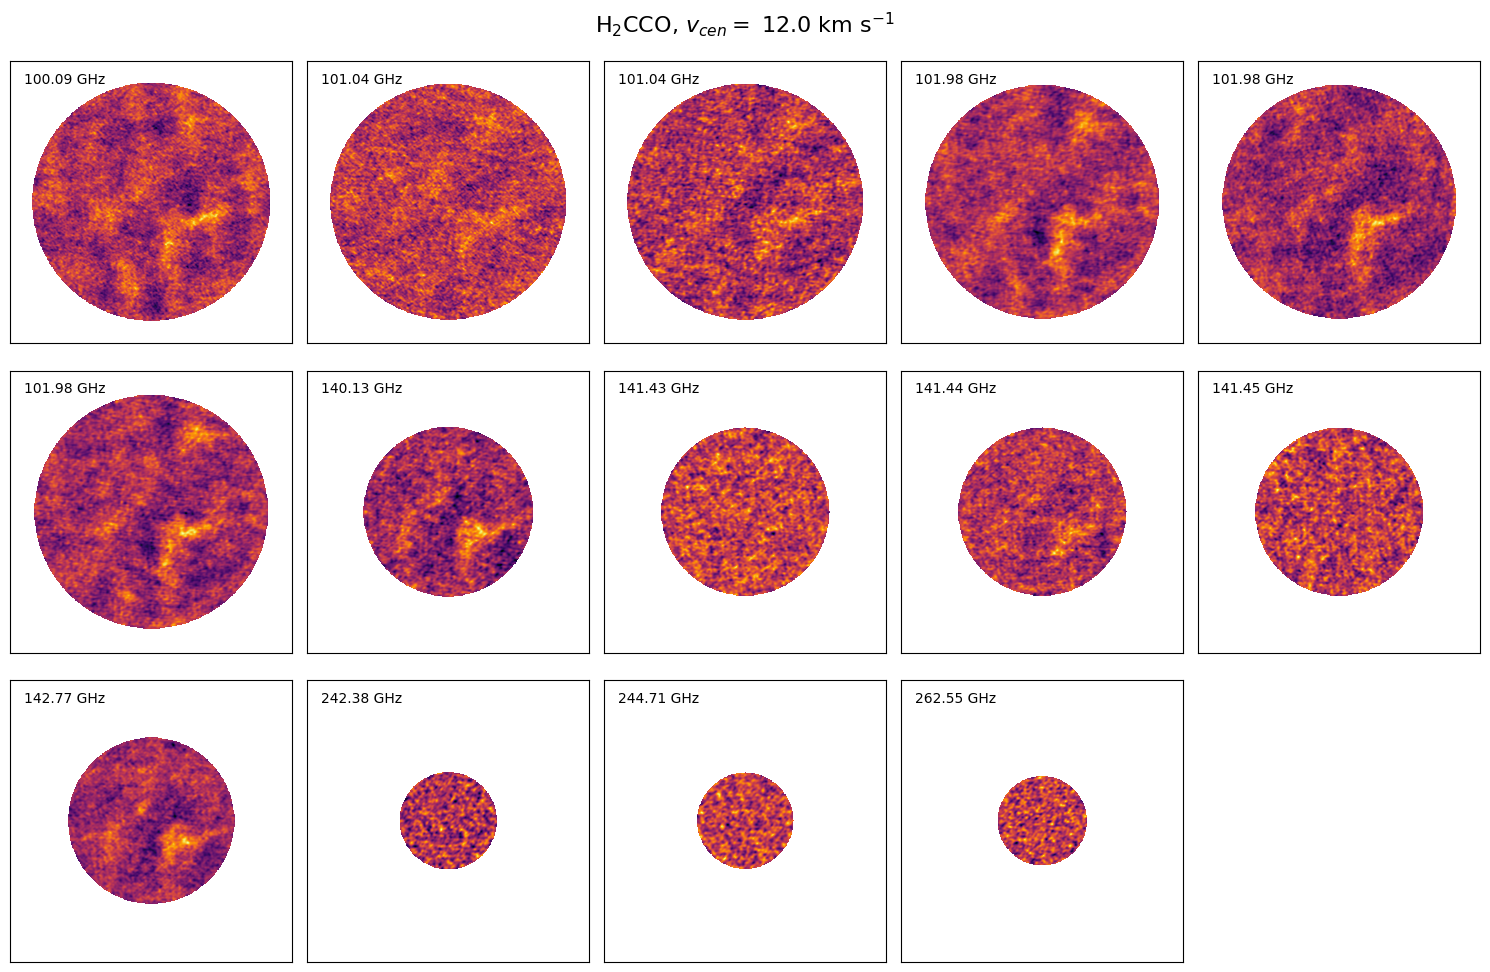

In [18]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12*u.km/u.s, fig_width=15, fig_height=10, nrows=3, ncols=5, name_for_plot=f'H$_2$CCO')